**CV 10 Programmes Assignment**


1. Jamuna KC-R21EA077
2. Deepthi Devaraj-R21EA073

1. write program to display image matrix

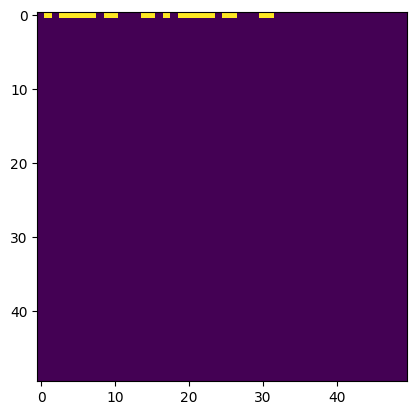

In [ ]:
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np
img=np.array([[0,255,0,255],
         [255,255,255,255],
         [0,255,255,0],
         [0,0,255,255],
         [0,255,0,255],
         [255,255,255,255],
         [0,255,255,0],
         [0,0,255,255]], dtype=np.uint8)
img1= img.resize(50,50)


plt.imshow(img)

2. write program to display Image Histogram

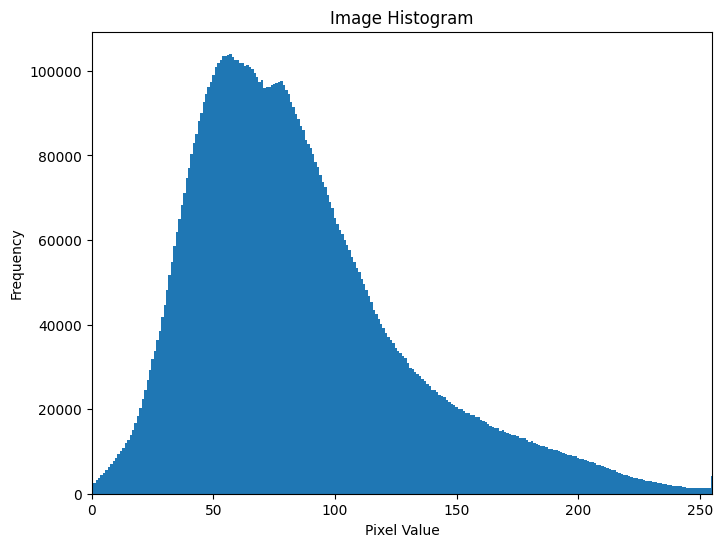

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
img = plt.imread('/content/style2.jpg')
hist, bins = np.histogram(img, bins=256, range=(0, 256))
plt.figure(figsize=(8, 6))
plt.bar(bins[:-1], hist, width=1)
plt.title('Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim(0, 255)
plt.show()

3. write program to find Histogram equalization and display that image

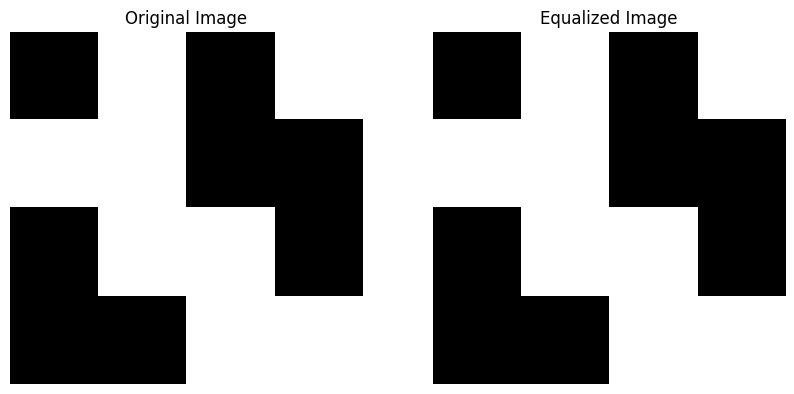

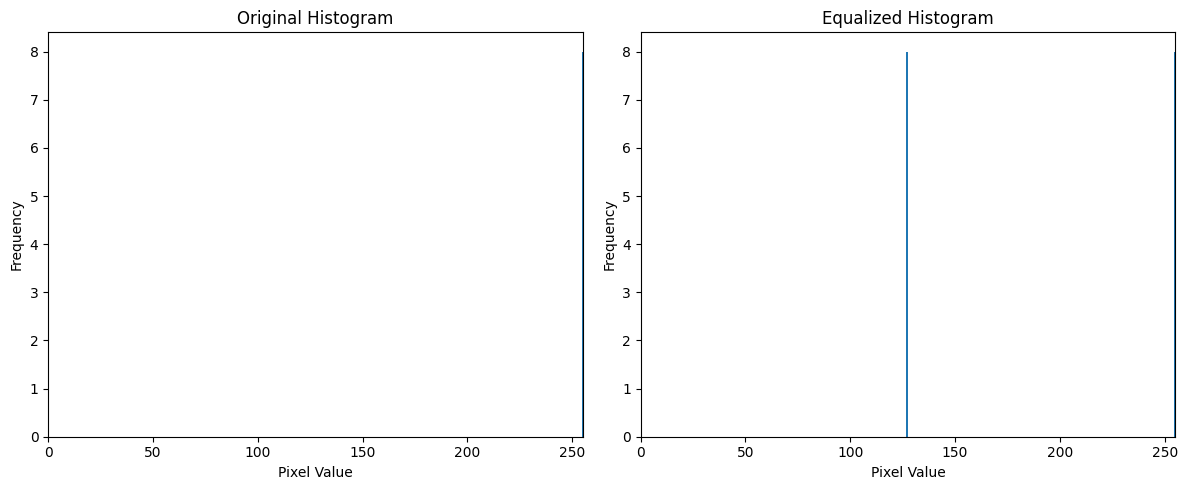

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
img = np.array([[0, 255, 0, 255],
                [255, 255, 0, 0],
                [0, 255, 255, 0],
                [0, 0, 255, 255]], dtype=np.uint8)
hist, bins = np.histogram(img, bins=256, range=(0, 256))
cdf = hist.cumsum()
cdf_normalized = cdf / cdf.max()
equalized_img = np.interp(img, bins[:-1], cdf_normalized * 255).astype(np.uint8)
equalized_hist, _ = np.histogram(equalized_img, bins=256, range=(0, 256))

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.title('Equalized Image')
plt.imshow(equalized_img, cmap='gray')
plt.axis('off')

# Show the histograms
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.bar(bins[:-1], hist, width=1)
plt.title('Original Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim(0, 255)

plt.subplot(122)
plt.bar(bins[:-1], equalized_hist, width=1)
plt.title('Equalized Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim(0, 255)

# Show the images and histograms
plt.tight_layout()
plt.show()


4. write program to smooth image using gaussian filter and display image

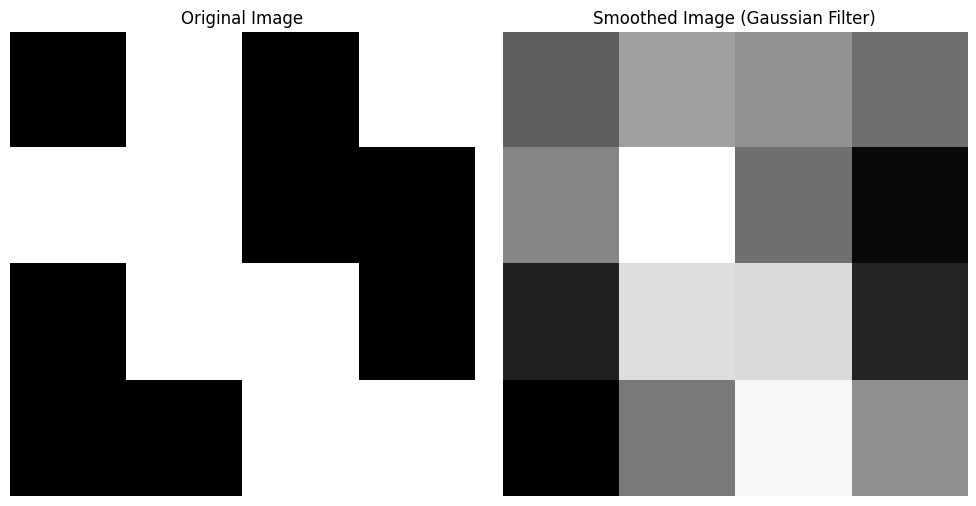

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

img = np.array([[0, 255, 0, 255],
                [255, 255, 0, 0],
                [0, 255, 255, 0],
                [0, 0, 255, 255]], dtype=np.uint8)
sigma = 1  # Standard deviation of the Gaussian
size = 5   # Size of the kernel (odd)
x, y = np.meshgrid(np.arange(-size // 2 + 1, size // 2 + 1),
                   np.arange(-size // 2 + 1, size // 2 + 1))
kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
kernel = kernel / kernel.sum()
smoothed_img = convolve2d(img, kernel, mode='same', boundary='wrap')

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.title('Smoothed Image (Gaussian Filter)')
plt.imshow(smoothed_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


5. write program to find 1st order dertivative and display image and firsr order derivative

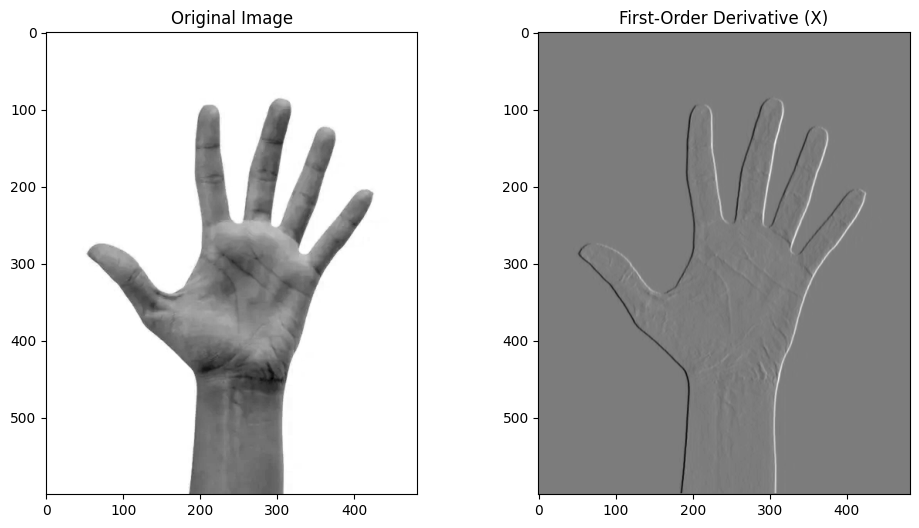

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def first_order_derivative(image):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    gradient_x = np.zeros_like(image, dtype=np.float32)
    gradient_y = np.zeros_like(image, dtype=np.float32)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            gradient_x[i, j] = np.sum(image[i - 1:i + 2, j - 1:j + 2] * sobel_x)
            gradient_y[i, j] = np.sum(image[i - 1:i + 2, j - 1:j + 2] * sobel_y)
    return gradient_x, gradient_y
image = plt.imread('/content/hand.jpg')
if len(image.shape) == 3:
    image = image.mean(axis=2)
gradient_x, gradient_y = first_order_derivative(image)
plt.figure(figsize=(18, 6))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(132)
plt.imshow(gradient_x, cmap='gray')
plt.title('First-Order Derivative (X)')

plt.show()


6. write program to find second order derivative and display image and second order derivative

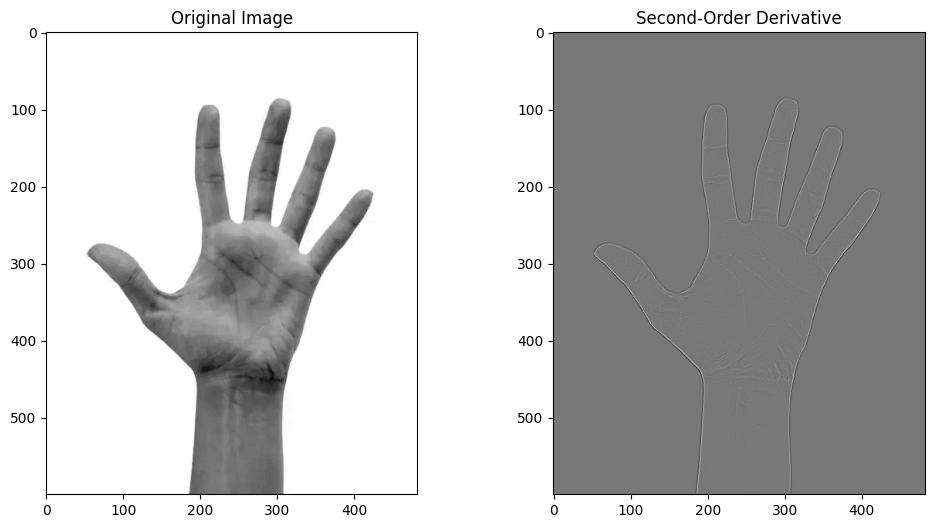

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def second_order_derivative(image):
    laplacian_kernel = np.array([[0, 1, 0],
                                 [1, -4, 1],
                                 [0, 1, 0]])
    second_derivative = np.zeros_like(image, dtype=np.float32)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            second_derivative[i, j] = np.sum(image[i - 1:i + 2, j - 1:j + 2] * laplacian_kernel)

    return second_derivative

image = plt.imread('/content/hand.jpg')

if len(image.shape) == 3:
    image = image.mean(axis=2)

second_derivative = second_order_derivative(image)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(second_derivative, cmap='gray')
plt.title('Second-Order Derivative')

plt.show()


7. write program to determine the edges using connected set V. Draw line to draw an obejext border

In [ ]:

image_matrix = [
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]

def connected_set_v(image):
    edges = set()
    rows = len(image)
    cols = len(image[0])

    for i in range(rows):
        for j in range(cols):
            if image[i][j] == 1:
                if i == 0 or i == rows - 1 or j == 0 or j == cols - 1:
                    edges.add((i, j))
                else:
                    if image[i-1][j] == 0 or image[i+1][j] == 0 or image[i][j-1] == 0 or image[i][j+1] == 0:
                        edges.add((i, j))

    return edges

def display_object_border(edges):
    max_row = max(edges, key=lambda x: x[0])[0]
    max_col = max(edges, key=lambda x: x[1])[1]

    for row in range(max_row + 1):
        line = ""
        for col in range(max_col + 1):
            if (row, col) in edges:
                line += "# "
            else:
                line += ". "
        print(line)

edges = connected_set_v(image_matrix)
display_object_border(edges)


. . . . 
. # # # 
. # . # 
. # # # 


8.  write program to work on 1st order and secod order derivative

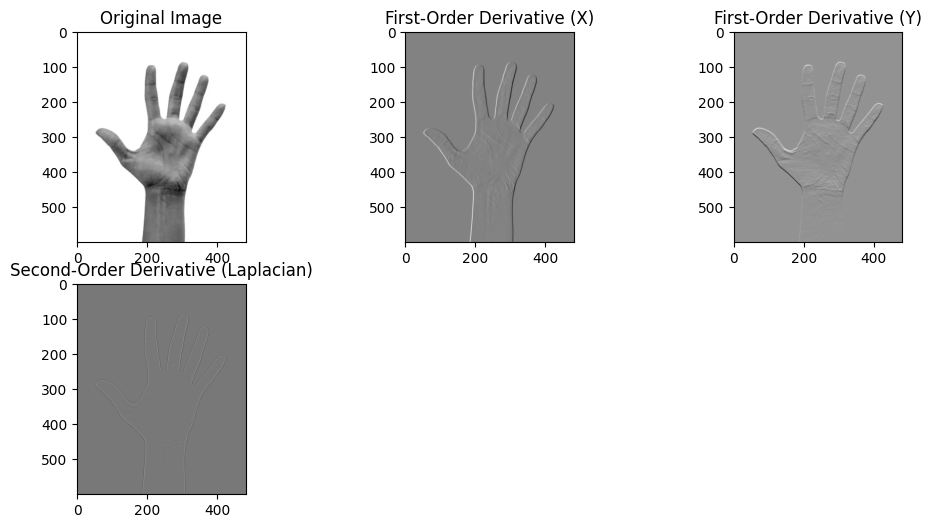

In [ ]:
import numpy as np
from scipy.ndimage import convolve

import matplotlib.pyplot as plt
image = plt.imread('/content/hand.jpg')
if len(image.shape) == 3:
    image = image.mean(axis=2)

sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
gradient_x = convolve(image, sobel_x)
gradient_y = convolve(image, sobel_y)

laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian_image = convolve(image, laplacian)

plt.figure(figsize=(12, 6))
plt.subplot(231)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(232)
plt.imshow(gradient_x, cmap='gray')
plt.title('First-Order Derivative (X)')
plt.subplot(233)
plt.imshow(gradient_y, cmap='gray')
plt.title('First-Order Derivative (Y)')
plt.subplot(234)
plt.imshow(laplacian_image, cmap='gray')
plt.title('Second-Order Derivative (Laplacian)')

plt.show()


9. write program to determine Image gradient using Sobel operators

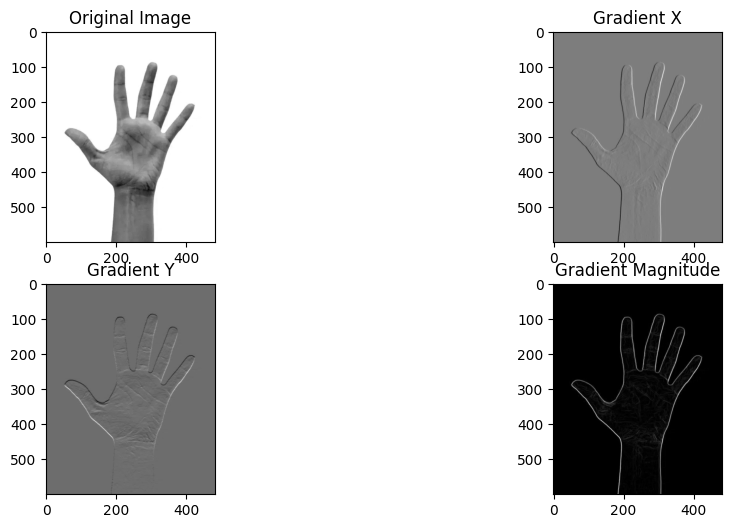

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sobel_operator(image):
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    gradient_x = convolve(image, sobel_x)
    gradient_y = convolve(image, sobel_y)
    gradient_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)
    return gradient_x, gradient_y, gradient_magnitude, gradient_direction

def convolve(image, kernel):
    rows, cols = image.shape
    k_rows, k_cols = kernel.shape
    output = np.zeros((rows, cols))
    pad_height = k_rows // 2
    pad_width = k_cols // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='edge')
    for i in range(pad_height, rows + pad_height):
        for j in range(pad_width, cols + pad_width):
            output[i - pad_height, j - pad_width] = np.sum(padded_image[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1] * kernel)

    return output

input_image = plt.imread('/content/hand.jpg')
if len(input_image.shape) == 3:
    input_image = input_image.mean(axis=2)
gradient_x, gradient_y, gradient_magnitude, gradient_direction = sobel_operator(input_image)

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')

plt.subplot(2, 2, 2)
plt.imshow(gradient_x, cmap='gray')
plt.title('Gradient X')

plt.subplot(2, 2, 3)
plt.imshow(gradient_y, cmap='gray')
plt.title('Gradient Y')

plt.subplot(2, 2, 4)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')

plt.show()


10. image enhancement using Fourier transformations


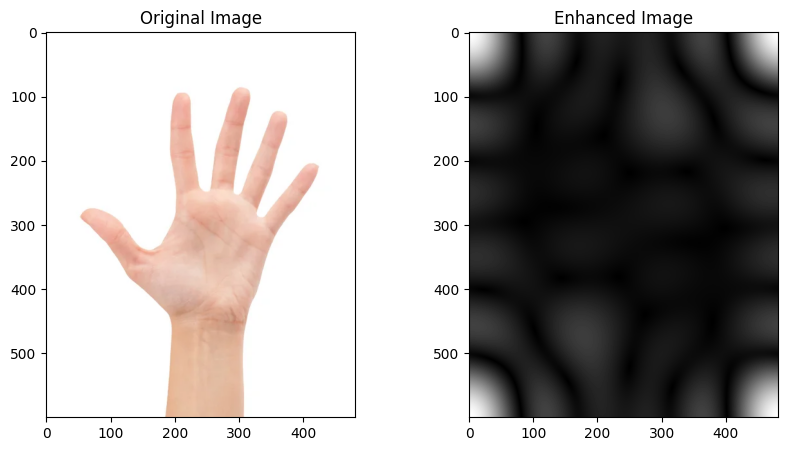

In [ ]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

def fourier_image_enhancement(input_image):
    image = plt.imread(input_image)
    if len(image.shape) == 3:
        image = image.mean(axis=2)
    f_transform = fftpack.fft2(image)
    magnitude_spectrum = np.abs(f_transform)
    cutoff_frequency = 3
    rows, cols = image.shape
    center_row, center_col = rows // 2, cols // 2
    mask = np.zeros_like(magnitude_spectrum)
    mask[center_row - cutoff_frequency:center_row + cutoff_frequency,
         center_col - cutoff_frequency:center_col + cutoff_frequency] = 1
    enhanced_spectrum = magnitude_spectrum * mask
    enhanced_image = np.abs(fftpack.ifft2(fftpack.ifftshift(enhanced_spectrum)))
    enhanced_image = (enhanced_image - np.min(enhanced_image)) / (np.max(enhanced_image) - np.min(enhanced_image)) * 255
    enhanced_image = enhanced_image.astype(np.uint8)

    return enhanced_image
input_image_filename = '/content/hand.jpg'
enhanced_image = fourier_image_enhancement(input_image_filename)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(plt.imread(input_image_filename), cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(enhanced_image, cmap='gray')
plt.title('Enhanced Image')
plt.show()
plt.imsave('enhanced_image.png', enhanced_image, cmap='gray')
